In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install mne
!pip install moabb
!pip install braindecode
!pip install numpy==1.24.4



In [3]:
!cp /content/drive/MyDrive/compIV2_a_b/BCICIV_2b_gdf.zip /content/


In [4]:
!unzip /content/BCICIV_2b_gdf.zip -d data

Archive:  /content/BCICIV_2b_gdf.zip
  inflating: data/B0101T.gdf         
  inflating: data/B0102T.gdf         
  inflating: data/B0103T.gdf         
  inflating: data/B0104E.gdf         
  inflating: data/B0105E.gdf         
  inflating: data/B0201T.gdf         
  inflating: data/B0202T.gdf         
  inflating: data/B0203T.gdf         
  inflating: data/B0204E.gdf         
  inflating: data/B0205E.gdf         
  inflating: data/B0301T.gdf         
  inflating: data/B0302T.gdf         
  inflating: data/B0303T.gdf         
  inflating: data/B0304E.gdf         
  inflating: data/B0305E.gdf         
  inflating: data/B0401T.gdf         
  inflating: data/B0402T.gdf         
  inflating: data/B0403T.gdf         
  inflating: data/B0404E.gdf         
  inflating: data/B0405E.gdf         
  inflating: data/B0501T.gdf         
  inflating: data/B0502T.gdf         
  inflating: data/B0503T.gdf         
  inflating: data/B0504E.gdf         
  inflating: data/B0505E.gdf         
  inflating: 

In [82]:
import mne
raw=mne.io.read_raw_gdf('/content/data/B0102T.gdf',eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

Extracting EDF parameters from /content/data/B0102T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4
Creating raw.info structure...


/tmp/ipython-input-350532125.py:2: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf('/content/data/B0102T.gdf',eog=['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])


In [83]:
raw.drop_channels(['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

<RawGDF | B0102T.gdf, 3 x 552452 (2209.8 s), ~8 KiB, data not loaded>

In [ ]:

raw.load_data()
# Step 2: Apply a Butterworth bandpass filter
low_cutoff = 3  # Low cutoff frequency (Hz)
high_cutoff = 40  # High cutoff frequency (Hz)
filter_order = 5  # Filter order (3rd order Butterworth filter)

raw.plot(block=True, title="EEG Data for", scalings='auto')

# Apply the filter
raw.filter(l_freq=low_cutoff, h_freq=high_cutoff, method='iir', iir_params={'order': filter_order, 'ftype': 'bessel'})
raw.plot(block=True, title="EEG Data for", scalings='auto')


# raw.plot_sensors(show_names=True)  # Show electrode names
# raw.plot_sensors(kind='3d')  # Show electrode positions in 3D

#

In [84]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('1023'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770')]


In [70]:
events[1]

{np.str_('1023'): 1,
 np.str_('1077'): 2,
 np.str_('1078'): 3,
 np.str_('1079'): 4,
 np.str_('1081'): 5,
 np.str_('276'): 6,
 np.str_('277'): 7,
 np.str_('32766'): 8,
 np.str_('768'): 9,
 np.str_('769'): 10,
 np.str_('770'): 11}

In [ ]:
events[0][:]

In [61]:
(events[1])

{np.str_('1023'): 1,
 np.str_('1077'): 2,
 np.str_('1078'): 3,
 np.str_('1079'): 4,
 np.str_('1081'): 5,
 np.str_('276'): 6,
 np.str_('277'): 7,
 np.str_('32766'): 8,
 np.str_('768'): 9,
 np.str_('769'): 10,
 np.str_('770'): 11}

In [81]:
import numpy as np


print('len(events[1])=',len(events[1]))
if len(events[1])!=5:
  event_dict={
  'Rejected': 1,
  'Eye Move Hor': 2,
  'Eye Move Ver': 3,
  'Eye Rot': 4,
  'Eye Blink': 5,
  'Eye Open': 6,
  'Eye Close': 7,
    'START Run': 8,
  'Strart TRial': 9,
  'Class 1': 10,
  'Class 2': 11}

else:
    event_dict={
    'Rejected': 1,
    'START Run': 2,
    'Strart TRial': 3,
    'Class 1': 4,
    'Class 2': 5}

A=np.array(list(event_dict.values()))


print((A[-1]))
event_id=[A[-2],A[-1]]
print(event_id)



len(events[1])= 11
11
[np.int64(10), np.int64(11)]


250.0


/tmp/ipython-input-1568670331.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig=mne.viz.plot_events(events[0], event_id=event_dict,sfreq=raw.info['sfreq'], first_samp=raw.first_samp)


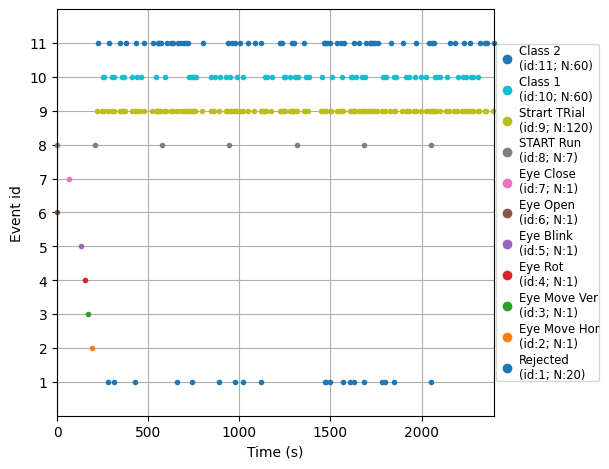

In [80]:
print(sfreq)
fig=mne.viz.plot_events(events[0], event_id=event_dict,sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

In [91]:
epoch=mne.Epochs(raw,events[0],event_id=[4,5], tmin=-.10,tmax=7)#baseline=(0,0),

#print(epoch.drop_log)

Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 120 events and 1776 original time points ...
0 bad epochs dropped
(120, 3, 1776)
[4 5 5 4 5]


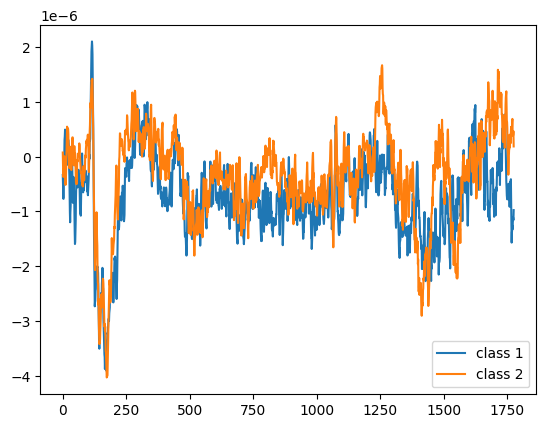

In [92]:
import numpy as np
import matplotlib.pyplot as plt

X=epoch.get_data()
#print(epoch.drop_log)

print(X.shape)
#X=(X[:,:,200:1000])


y=epoch.events [:,-1]
print((y[0:5]))

xclss1=X[y==4].mean(axis=(0,1))
xclss2=X[y==5].mean(axis=(0,1))



#X=np.mean(X,axis=)

# print(xclss11.shape)
# print(xclss22.shape)
# print(xclss33.shape)
# print(xclss44.shape)


plt.plot(xclss1)
plt.plot(xclss2)

plt.legend(['class 1','class 2'])
plt.show()


In [32]:
labels=epoch.events[:,-1]
labels

array([4, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4,
       5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5,
       4, 4, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4,
       5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5,
       5, 4, 5, 4, 4, 5, 5, 4, 5, 4])

In [33]:
evoked_1=epoch['4'].average()
evoked_2=epoch['5'].average()


In [34]:
dicts={'left':evoked_1,'right':evoked_2}

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


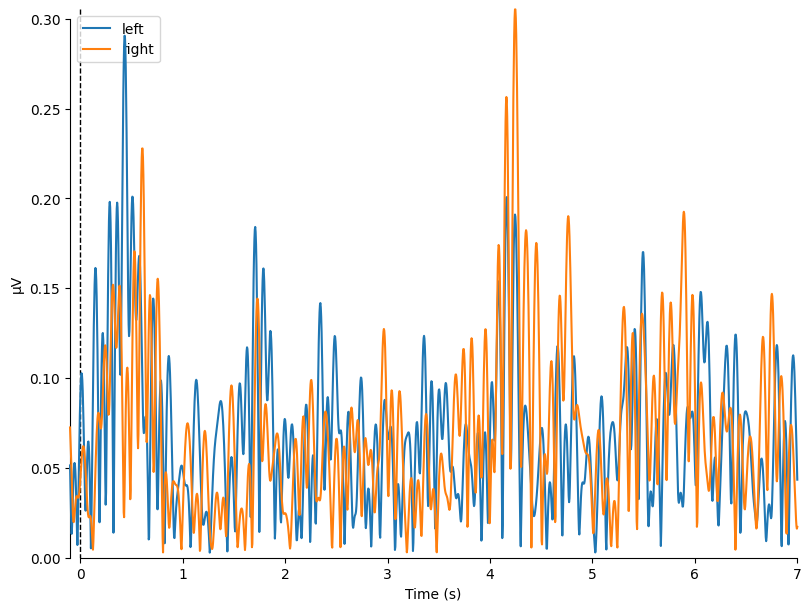

[<Figure size 800x600 with 1 Axes>]

In [35]:
mne.viz.plot_compare_evokeds(dicts,legend=True)

In [ ]:
labels=epoch.events[:,-1]
labels.shape

(120,)

In [36]:
def read_data(path,keys_to_use=['769', '770']):

  raw=mne.io.read_raw_gdf(path,preload=True)
  raw.drop_channels(['EOG:ch01', 'EOG:ch02', 'EOG:ch03'])
  raw.set_eeg_reference()
  raw.filter(l_freq=3, h_freq=40, method='iir', iir_params={'order': 3, 'ftype': 'bessel'})
  #events=mne.events_from_annotations(raw)

  events, event_id_mapping = mne.events_from_annotations(raw)
  #print('======',event_id_mapping)

  filtered_event_id = {key: event_id_mapping[key] for key in keys_to_use if key in event_id_mapping}
  #print('======',filtered_event_id)




        # Check for missing keys
  missing_keys = [key for key in keys_to_use if key not in event_id_mapping]
  #print('======',missing_keys)
  if missing_keys:
    raise ValueError(f"Missing annotation keys: {missing_keys}")

  #print("=======Filtered Event ID Mapping:", filtered_event_id.values())


  epoch   =mne.Epochs(raw,events, event_id=filtered_event_id,tmin=-0.1,tmax=7)#,on_missing='warn')
  #epochs = mne.Epochs(raw, events  , event_id=filtered_event_id, tmin=-0.1, tmax=.4, baseline=None)
  #print("=======epoch:")

  features=epoch.get_data()
  labels=epoch.events[:,-1]
  return features,labels


In [37]:
features1,labels1=read_data('/content/data/B0103T.gdf')#, keys_to_use=['769', '770'])# '/content/data/B0102T.gdf'  (B0101T.gdf) (B0102T.gdf)  (B0103T.gdf)(B0104E.gdf) (B0105E.gdf)
features2,labels2=read_data('/content/data/B0203T.gdf')
features3,labels3=read_data('/content/data/B0303T.gdf')
features4,labels4=read_data('/content/data/B0403T.gdf')
features5,labels5=read_data('/content/data/B0503T.gdf')
features6,labels6=read_data('/content/data/B0603T.gdf')
features7,labels7=read_data('/content/data/B0703T.gdf')
features8,labels8=read_data('/content/data/B0803T.gdf')
features9,labels9=read_data('/content/data/B0903T.gdf')


# import numpy as np

# Data=np.concatenate((features1,features2,features3,features4,features5,features6,features7,features8,features9),axis=0)
# Labels=np.concatenate((labels1,labels2,labels3,labels4,labels5,labels6,labels7,labels8,labels9),axis=0)



Extracting EDF parameters from /content/data/B0103T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...
Reading 0 ... 469010  =      0.000 ...  1876.040 secs...


/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0203T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0303T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0403T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0503T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0603T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0703T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0803T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/data/B0903T.gdf...
GDF file detected
Se

/tmp/ipython-input-1868107179.py:3: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw=mne.io.read_raw_gdf(path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 40 Hz

IIR filter parameters
---------------------
Bessel/Thomson bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 3.00, 40.00 Hz: -12.47, -12.47 dB

Used Annotations descriptions: [np.str_('1023'), np.str_('1077'), np.str_('1078'), np.str_('1079'), np.str_('1081'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('781')]
Not setting metadata
160 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 1776 original time points ...
0 bad epochs dropped


In [93]:
print(features1.shape,labels1.shape)
print(features2.shape,labels2.shape)
print(features3.shape,labels3.shape)
print(features4.shape,labels4.shape)
print(features5.shape,labels5.shape)
print(features6.shape,labels6.shape)
print(features7.shape,labels7.shape)
print(features8.shape,labels8.shape)
print(features9.shape,labels9.shape)

print(labels1[0:10])

(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
(160, 3, 1776) (160,)
[11 10 11 10 10 10 11 10 10 10]


In [106]:
import scipy.io
from google.colab import files

for i in range(1,10):
  featurevar=globals()[f"features{i}"]
  labels_var=globals()[f"labels{i}"]

  #print(labels_var[0:15])

  filename={'Data':featurevar,'Labels':labels_var}

  print(filename['Data'][0][0][0:1],filename['Labels'][0:5])

  #print(filename['Data'].shape,filename['Labels'].shape)
  scipy.io.savemat(f"subject_0{i}T.mat",filename)

[2.01033015e-06] [11 10 11 10 10]
[1.66624746e-07] [11 10 10 11 10]
[2.42331551e-06] [11 10 11 10 10]
[2.26402352e-06] [11 10 10 11 11]
[-3.17182281e-08] [10 11 10 11 11]
[2.61122592e-06] [10 10 11 10 11]
[6.53308611e-07] [10 10 11 11 11]
[-3.03635271e-06] [10 11 11 11 11]
[1.49647812e-06] [11 10 10 11 10]


In [40]:
!zip -r subjcts_bessel2b_data.zip *.mat

  adding: subject_01T.mat (deflated 4%)
  adding: subject_02T.mat (deflated 4%)
  adding: subject_03T.mat (deflated 4%)
  adding: subject_04T.mat (deflated 4%)
  adding: subject_05T.mat (deflated 4%)
  adding: subject_06T.mat (deflated 4%)
  adding: subject_07T.mat (deflated 4%)
  adding: subject_08T.mat (deflated 4%)
  adding: subject_09T.mat (deflated 4%)
